In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# Load in csv
filepath = os.path.join("city_data.csv")
df = pd.read_csv(filepath)
filepath = os.path.join("ride_data.csv")
df2 = pd.read_csv(filepath)

In [3]:
# Merge the data frames
merge_df = pd.merge(df, df2, on="city")
types = merge_df.groupby(['type'])
merge_df.head()
totals = pd.DataFrame(merge_df)
total_count = totals['fare'].count()
total_fares = totals['fare'].sum()

In [4]:
drop_df = merge_df.drop_duplicates('city')
s = drop_df['driver_count']

In [5]:
# Group data and clean it up
grouped_merge_df = merge_df.groupby(['type', 'city']).fare.agg(['count', 'mean'])
grouped_merge_df.columns = ['Total Rides', 'Average Fare']

rural = grouped_merge_df.loc['Rural']
urban = grouped_merge_df.loc['Urban']
suburban = grouped_merge_df.loc['Suburban']


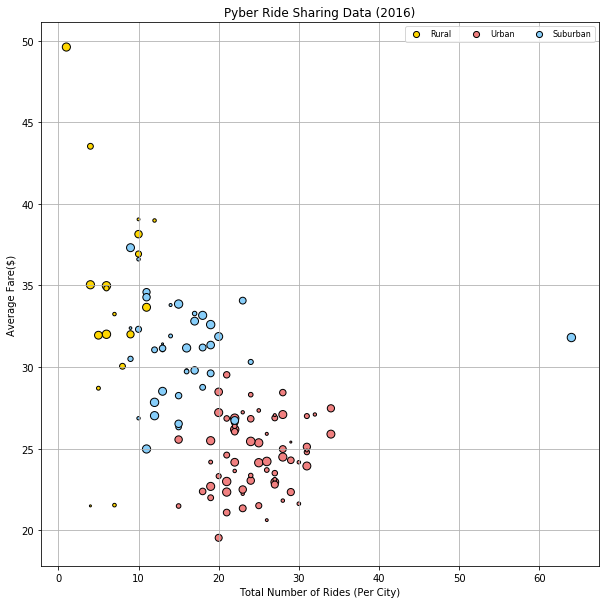

In [6]:
plt.figure(figsize = (10,10))
rural = plt.scatter(rural['Total Rides'], rural['Average Fare'], s=s, color='gold', edgecolors='black')
urban = plt.scatter(urban['Total Rides'], urban['Average Fare'], s=s, color='lightcoral', edgecolors='black')
suburban = plt.scatter(suburban['Total Rides'], suburban['Average Fare'], s=s, color='lightskyblue', edgecolors='black')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.legend((rural, urban, suburban),('Rural', 'Urban','Suburban'),numpoints=1, loc='best', ncol=3, fontsize=8)
plt.grid()
plt.show()


In [7]:
# Create a chart for fares grouped by type to create ride percentages and fare percentages pie graph
total_rides = grouped_merge_df['Total Rides'].count
grouped_df = merge_df.groupby(['type']).fare.agg(['count', 'sum'])
grouped_df.columns = ['Total Rides', 'Total Fares']
grouped_df['Total Rides Percentage'] = grouped_df['Total Rides'] / total_count * 100
grouped_df['Total Fares Percentage'] = grouped_df['Total Fares'] / total_fares * 100
grouped_df.head()

,Total Rides,Total Fares,Total Rides Percentage,Total Fares Percentage
type,,,,
Rural,125,4255.09,5.193187,6.579786
Suburban,657,20335.69,27.295388,31.445750
Urban,1625,40078.34,67.511425,61.974463


In [8]:
# Create a chart for driver counts by type to create driver count percentage pie graphs
drop_df = merge_df.drop_duplicates('city')
drivers_type = drop_df.groupby(['type']).driver_count.agg(['sum'])
drivers_type.columns = ['Driver Counts']
total_drivers = drop_df['driver_count'].sum()
drivers_type['Total Driver Percentage'] = drivers_type['Driver Counts'] / total_drivers * 100
drivers_type

,Driver Counts,Total Driver Percentage
type,,
Rural,104,3.108189
Suburban,635,18.977884
Urban,2607,77.913927


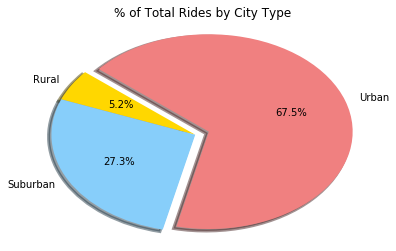

In [9]:
labels= grouped_df.index.values
sizes=grouped_df['Total Rides Percentage']
colors=['gold','lightskyblue','lightcoral']
explode = [0,0,0.1]
plt.pie(sizes,labels=labels,colors=colors ,explode=explode, autopct="%1.1f%%", shadow=True,startangle=140, wedgeprops = {'linewidth': 3} )
plt.axis('tight')
plt.title('% of Total Rides by City Type')
plt.show()

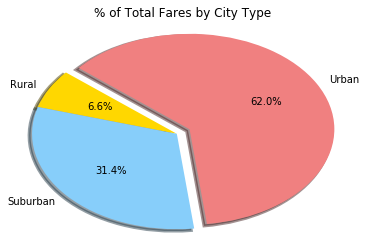

In [10]:
labels= grouped_df.index.values
sizes=grouped_df['Total Fares Percentage']
plt.pie(sizes,labels=labels,colors=colors ,explode=explode, autopct="%1.1f%%", shadow=True,startangle=140, wedgeprops = {'linewidth': 3} )
plt.axis('tight')
plt.title('% of Total Fares by City Type')
plt.show()



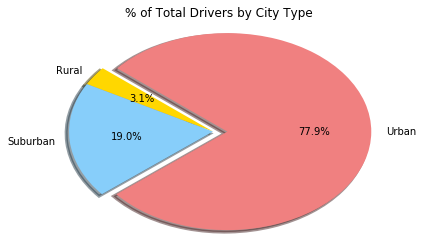

In [11]:
labels= drivers_type.index.values
sizes= drivers_type['Total Driver Percentage']
plt.pie(sizes,labels=labels,colors=colors ,explode=explode, autopct="%1.1f%%", shadow=True,startangle=140, wedgeprops = {'linewidth': 3} )
plt.axis('tight')
plt.title('% of Total Drivers by City Type')
plt.show()